# Feature Analysis

In [7]:
import helpers as h
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv("../data/creditcard.csv")
Features = ['V%d' % n for n in range(1, 29)]

### Helper Functions

In [66]:
def bootstrap_mean(df, statistic, samples=500):
    """
    Returns an pandas series of mean bootstrap values for the statistic
    for each of the columns in the dataframe.

    Parameters
    ----------
    df: Pandas dataframe
    statistic: valid arguments include 'mean', 'median', 'std'
    samples: number of bootstrap samples to generate

    Returns
    -------
    Pandas Series
    """

    df_bootstrap = pd.DataFrame(columns=df.columns)
    for _ in range(samples):
        bootstrap = df.sample(n=len(df), replace=True, axis=0)
        if statistic == 'mean':
            df_bootstrap = df_bootstrap.append(bootstrap.mean(), ignore_index=True)
        elif statistic == 'median':
            df_bootstrap = df_bootstrap.append(bootstrap.median(), ignore_index=True)
        elif statistic == 'std':
            df_bootstrap = df_bootstrap.append(bootstrap.std(), ignore_index=True)
        else:
            print("Invalid statitic. Please use 'mean', 'median' or 'sdt'")
            return None
    df_bootstrap = df_bootstrap.mean()
#    df_bootstrap.reset_index(inplace=True)
    df_bootstrap.columns = ['Feature', statistic]
    return df_bootstrap.T

In [32]:
def ttest(sample1, sample2, Features):
    """
    Returns a dataframe with a single row containing the p values for each Feature when sample1
    is compared against sample2. Features are columns in the dataframe.

    Parameters
    ----------
    sample1: Pandas dataframe represting the sample transactions and their associated features.
    sample2: Pandas dataframe represting the sample transactions and their associated features.
    Features: List of column names from input dataframes that are to be evaluated.

    Returns
    -------
    Pandas DataFrame
    """

    p_lst = []
    for f in Features:
        stat, p_val = stats.ttest_ind(sample1[f], sample2[f], equal_var=False)  
        p_lst.append(p_val)
    df = pd.DataFrame(p_lst, index=Features).reset_index()
    df.columns = ['Feature','p_val']
    return df

### End of Helper Functions

In [35]:
### Plot feature ttest comparison

In [36]:
fraud_grp = data[(data['Class']==1) & (data['Amount']<=1)]
legit_grp = data[(data['Class']==0) & (data['Amount']<=1)]
df2 = ttest(fraud_grp, legit_grp, Features)

grp1 = data[(data['Class']==1) & (data['Amount']>1)]
grp2 = data[(data['Class']==0) & (data['Amount']>1)]
df3 = ttest(grp1, grp2, Features)

array([<AxesSubplot:title={'center':'p value (fraud vs. non-fraud) for transactions <= $1'}>,
       <AxesSubplot:title={'center':'p value (fraud vs. non-fraud) for transactions > $1'}>],
      dtype=object)

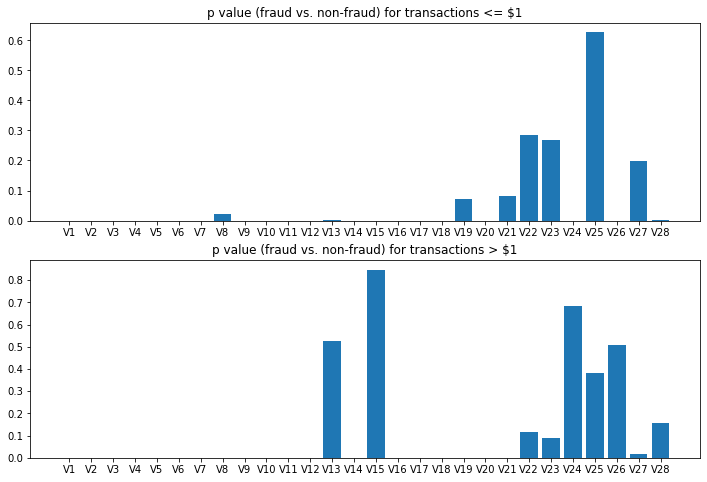

In [37]:
fig, axs = plt.subplots(2,1,figsize=(12,8))

x = df2['Feature']
y1 = df2['p_val']
y2 = df3['p_val']
axs[0].bar(x, y1)
axs[1].bar(x, y2)
axs[0].set_title('p value (fraud vs. non-fraud) for transactions <= $1')
axs[1].set_title('p value (fraud vs. non-fraud) for transactions > $1')
axs
# axs[1].set_ylim((0,0.01))

## Legitimate Transaction Sample

In [ ]:
df_stat_legit = data[Features][data['Class']==0].agg(['mean', 'median', 'std'])
df_stat_legit.head()

In [ ]:
df_stat_fraud = data[Features][data['Class']==1].agg(['mean', 'median', 'std'])
df_stat_fraud.head()

In [ ]:
df_stats_bsfraud['std'].sort_values()

## Bootstrap Fraud Sample

In [67]:
df_fraud = data[data['Class']==1][Features]
df_bootstrap = bootstrap_mean(df_fraud, 'std', samples=500)

In [68]:
print(df_bootstrap)

V1     6.779913
V2     4.286736
V3     7.107907
V4     2.865797
V5     5.366362
V6     1.853442
V7     7.188344
V8     6.763005
V9     2.494802
V10    4.887110
V11    2.674118
V12    4.640421
V13    1.100942
V14    4.271073
V15    1.048270
V16    3.855579
V17    6.947186
V18    2.889889
V19    1.535583
V20    1.335306
V21    3.840230
V22    1.487802
V23    1.541541
V24    0.515962
V25    0.793847
V26    0.470108
V27    1.376789
V28    0.546105
dtype: float64


In [ ]:
#import scikits.bootstrap as sci
df_fraud = data[Features][data['Class']==1]
df_bootstrap_mean = pd.DataFrame(columns=df_fraud.columns)
df_bootstrap_std = pd.DataFrame(columns=df_fraud.columns)
df_bootstrap_median = pd.DataFrame(columns=df_fraud.columns)

samples = 5000
for _ in range(samples):
    bootstrap = df_fraud.sample(n=len(df_fraud), replace=True, axis=0, random_state=1111)
    df_bootstrap_mean = df_bootstrap_mean.append(bootstrap.mean(), ignore_index=True)
    df_bootstrap_std = df_bootstrap_std.append(bootstrap.std(), ignore_index=True)
    df_bootstrap_median = df_bootstrap_median.append(bootstrap.median(), ignore_index=True)
bootstrap_mean = df_bootstrap_mean.mean()

bootstrap_mean.head()
# bootstrap_std = df_bootstrap_std.mean()
# bootstrap_median = df_bootstrap_median.mean()

In [ ]:
print(df_stats_bsfraud.transpose())

In [77]:
data['Amt_round'] = data['Amount'].round()
df5 = data[data['Class']==1].groupby('Amt_round')['Amt_round'].count()
df5.columns = ['cnt']

AttributeError: 'Series' object has no attribute 'info'

<AxesSubplot:xlabel='Amt_round'>

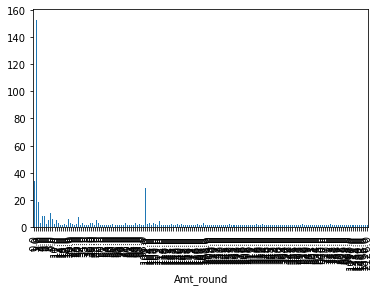

In [83]:
df5.plot.bar(x='Amt_round', y='cnt')